In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
mediapipe_hands = tf.lite.Interpreter("/home/great/repos/mediapipe/mediapipe/modules/hand_landmark/hand_landmark_lite.tflite")
mediapipe_hands.allocate_tensors()

mediapipe_hands_input_index = mediapipe_hands.get_input_details()[0]["index"]
mediapipe_hands_output_index = mediapipe_hands.get_output_details()[0]["index"]
mediapipe_hands_predictions = []

In [10]:
mediapipe_hands.get_input_details()

[{'name': 'input_1',
  'index': 0,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

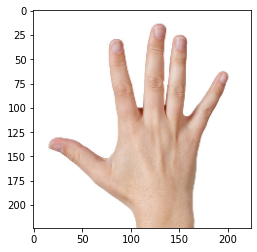

In [3]:
hand = cv2.imread("hand.jpg")
hand = cv2.resize(hand, dsize=(224, 224))
hand = cv2.cvtColor(hand, cv2.COLOR_BGR2RGB)
plt.imshow(hand)

In [4]:
x_test = []
x_test.append(hand)

In [6]:
for x_value in x_test:
    x_value_tensor = tf.convert_to_tensor([x_value], dtype = np.float32)
    mediapipe_hands.set_tensor(mediapipe_hands_input_index, x_value_tensor)
    mediapipe_hands.invoke()
    mediapipe_hands_predictions.append(mediapipe_hands.get_tensor(mediapipe_hands_output_index)[0])

In [64]:
hands_predictions = np.resize(mediapipe_hands_predictions, (21,3))

In [65]:
hands_predictions.shape[0]

21

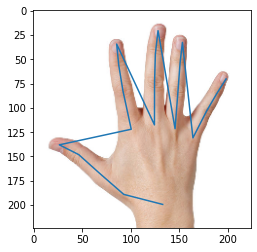

In [66]:
plt.imshow(hand)
plt.plot(hands_predictions[:,0], hands_predictions[:,1])
plt.show()

In [67]:
hand.shape

(224, 224, 3)

In [81]:
f = open("hand_data.c", "w")
f.write("#include \"tensorflow/lite/micro/examples/keyboard/hand_data.h\"\n")
f.write("#include \"tensorflow/lite/micro/examples/keyboard/model_settings.h\"\n")

f.write("const int g_hand_data_size = kMaxImageSize;\n")
f.write('const uint8_t g_hand_data[g_hand_data_size] = {')
w, h, c = hand.shape 
for y in range(h):
    for x in range(w):
        for k in range(c):
            f.write(str(hand[x][y][k]))
            f.write(", ")
        f.write("\n")
f.write("};\n")
f.close()